<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_4%EC%B0%A8%EC%8B%9C_iris_kmeans_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 거리행렬과 군집분석  
- 데이터 거리(머신러닝 전반에 걸쳐 매우 중요함)   
k개의 변수 x = { x_1, x_2, x_3, ..., x_k }  
D = {d_ij} = (d_11 ~ d_nn) 거리 행렬  
i = 행, j = 열  
데이터 i와 데이터 j의 거리를 구하는 것  

- 거리행렬의 산정방법  
 => 거리가 무엇인지 정확히 정의해야 함  
 => 수식으로 나타낼 수 있어야 함  
군집분석, 분류 등 수많은 문제 해결의 기초가 됨  
  
가장 많이 쓰이고 기초적인 거리  
- 유클리드 거리, 맨하튼 거리, 민콥스키 거리  
  
군집분석의 3가지 종류  
- Dendrogram : 거리행렬을 통해 데이터 포인트를 모두 계산,
 계층 군집의 일종  
- K-means : 데이터끼리의 평균 벡터 이용  
 평균 계산을 사용하여 군집 계산  
- DBSCAN : 밀도가 높은 부분을 군집으로 평가  
 밀도가 높을수록 군집 형성  
* 양 군집 간 거리를 정의하는 방법  
[1] 최단연결법 : 데이터A와 군집C와의 거리, 데이터B와 군집C와의 거리 중 최소값 선택  
[2] 최장연결법 : 거리 중 최대값 선택  
[3] 평균연결법 : 군집(AB)에 있는 모든 데이터와 군집C의 모든 데이터와의 거리의 합
 => 군집AB의 크기 + 군집C의 크기  
 => 두 군집 간의 거리 경우를 모두 구한 다음 평균을 내는 것!  
[4] 중심연결법  
 => mean(X) = (n_1* mean(X_1) + n_1 * mean(X_2)) / (n_1 + n_2)  
A의 평균 벡터, B의 평균벡터를 이용하여, 가중평균을 고려한 A와 B의 중심을 구한다.
=> 군집의 크기에 따라서 가중평균을 구함  
[5] 워드연결법 : (ex) 2개의 군집 간의 거리는 이 군집 2개를 하나로 합쳤을 때, 늘어나는 오차제곱합을 증분으로 정의  
ESS 거리 = sum(from k=1 to K) sum_(X_i is include in c_k) sum(from j=1 to n) (X_ij - mean(X_kj))^2  
k : 군집의 번호, K : 군집의 총 개수(여기에서는 K=2)  
C_k : k번째의 군집, X_i : C_k 내부의 원소  
2개의 군집을 합칠 때 오차제곱합 거리가 가장 작은 쪽으로 융합  
  
- 양 군집간 거리를 정의하는 5가지 방법의 공통점?  
: 가장 짧은 거리의 군집을 결합하면서 서로 하나씩 융합시키는 것  
  
ex) 아이리스 데이터 => Dendrogram 사용 : 아이리스 데이터에서 가장 가까운 붓꽃끼리 연결  
 - x축 = 붓꽃, y축 = 거리  
 - 특성  
  + 어느 붓꽃끼리가 가까운지 확인 가능  
  + 군집이 어떻게 형성되는지 확인 가능  
  + 몇 개의 군집이 있는지 확인 가능  
 - 붓꽃은 서로 비슷한 속성끼리 군집 형성  
 Dendrogram의 단점 : 모든 데이터를 다 계산하기 때문에 많은 메모리를 필요로 함, 대체적으로 큰 규모의 데이터에서 사용하기 힘듦, 전반적인 군집의 패턴 확인에 용이함  
  
K-means : 군집의 평균을 매번 계산하여 움직이지 않을 때까지 군집을 결정하는 방법  
DBSCAN :  데이터의 밀집된 밀도를 기반으로 군집을 나누는 방법  
  
K-means, DBSCAN : 비계층형 군집분석  
Dendrogram : 계층형 군집분석  
  
K-means의 특성  
 - 원 형태의 군집에 최적화  
 - 길쭉한 형태의 군집은 잘 잡아내지 못함  
DBSCAN의 특성  
 - 길쭉한 형태의 군집도 잘 잡아냄  
 - 노이즈를 자동으로 잡아낼 수 있음  

* K-means 알고리즘  
K-means FLOW  
[1] 임의 k개의 학습 데이터를 평균벡터로 설정(군집중심 초기 설정)  
[2] 데이터를 k개의 평균벡터에 대하여 분류(가장 가까운 점으로)  
[3] 분류된 데이터에 대하여 평균벡터(군집중심)을 구함(새로운 k개 평균벡터를 구함)  
[4] 2번~3번을 k개의 평균벡터가 변합이 없을때까지 계속 반복  
  
군집 분석 적용가능 사례)  
학생들의 속성이나 성적 분포를 가지고 학생들의 class을 나누어 볼 수도 있고 버섯의 색깔이나 모양 등의
여러가지의 특성(feature)들을 가지고 몇가지의 그룹으로 나누어 보거나 백화점 고객들의 쇼핑리스트의 속성을
입력값으로 하여 고객의 특성을 여러가지 그룹으로 나누어 볼 수 있습니다.
  
* 군집분석 사례 - iris  
계층형 군집분석(덴드로그램)  
K-평균 군집  
시각화나 EDA를 통하여 업무적으로 가장 설명이 효율적인 군집의 개수 k를 가늠할 수 있다.  
k가 작으면서 분산이 가장 좋은 k를 추출하기도 한다.  

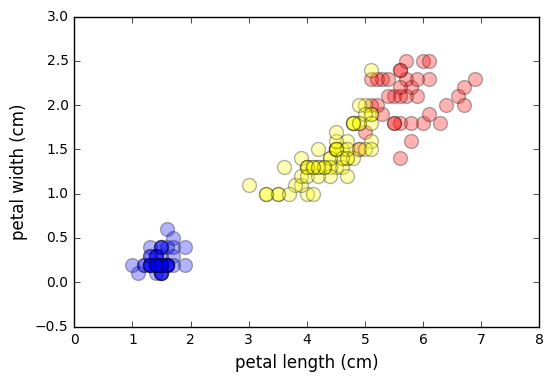

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

%matplotlib inline

# iris 데이터를 로드
iris = datasets.load_iris()
data = iris['data']

# 학습 → 클러스터 생성
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# 학습 결과의 라벨 취득
labels = model.labels_

# 그래프 그리기
ldata = data[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='red' ,alpha=0.3,s=100 ,marker="o")

ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='blue' ,alpha=0.3,s=100 ,marker="o")

ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='yellow' ,alpha=0.3,s=100 ,marker="o")

# 축 라벨의 설정
plt.xlabel(iris["feature_names"][2],fontsize='large')
plt.ylabel(iris["feature_names"][3],fontsize='large')

plt.show()


0인 경우 : Red  
2인 경우 : Yellow  
1인 경우 : Blue  

=> 군집분석이 잘 된 케이스!!

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
data , data.shape , type(data)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

 => 4개의 데이터 속성

In [ ]:
iris['target'] == model.labels_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

Target값과 Label값이 일치하는 경우는 드물다  
군집과 Iris Target값 결과는 관련이 없음

In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
예측 target값이 따로 존재하지 않으므로 비감독(비지도)학습이라고 함!